In [27]:
import pickle
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

zall_file = '/home/dipiano/E4/irf_random/crab/irf_random_full_ds_snr.txt'
z20_file = '/home/dipiano/E4/irf_z20/crab/irf_z20_full_ds_snr.txt'

zall = pd.read_csv(zall_file, sep=' ', header=0).sort_values(by=['seed']).dropna()
z20 = pd.read_csv(z20_file, sep=' ', header=0).sort_values(by=['seed']).dropna()  

len(zall), len(z20)

(8082, 0)

In [28]:
zall.head()

,seed,loc_ra,loc_dec,counts_on,counts_off,excess,excess_err,sigma,snr
2,3,76.894712,-66.343824,145.0,617.0,93.583333,27.604347,10.048215,3.510678
3,4,125.480814,-44.467154,189.0,708.0,138.428571,29.949958,14.058160,4.758067
4,5,214.105104,42.757503,161.0,771.0,118.166667,30.528675,13.177265,3.962811
5,6,352.536952,43.604779,89.0,110.0,67.000000,14.106736,9.240755,5.036028
6,7,42.802217,86.979388,164.0,101.0,138.750000,16.278821,14.856795,8.960942


In [29]:
z20.head()

,seed,loc_ra,loc_dec,counts_on,counts_off,excess,excess_err,sigma,snr


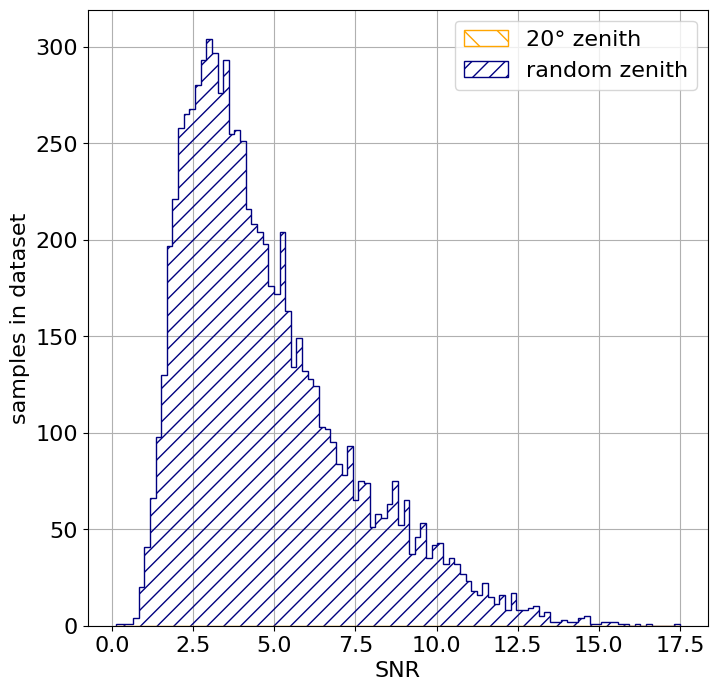

In [32]:
import matplotlib.patches as mpatches

colors = ['orange', 'navy']
labels = ['20° zenith', 'random zenith']
hatches = ['\\', '//']
histsize = (8,8)
fs = 16
legends = [mpatches.Patch(facecolor='none', edgecolor=colors[0], hatch=hatches[0]), 
           mpatches.Patch(facecolor='none', edgecolor=colors[1], hatch=hatches[1])]

# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr'], zall['snr'])
#ax.set_title('background residuals', fontsize=fs*1.5)
n, bins, patches = ax.hist(data, 100, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr_z20_zALL.png')